In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utility

%matplotlib inline

In [2]:
## Bioassay data

bioassay_data = pd.DataFrame({
    'x': [-0.86, -0.30, -0.05, 0.73],
    'n': [5, 5, 5, 5],
    'y': [0, 1, 3, 5]
})

In [3]:
## Generate the grid points and pairwise coordinates

x = np.linspace(-1.5, 7, 100)
y = np.linspace(-5, 35, 100)
alpha, beta = np.meshgrid(x, y) #100 x 100 meshgrids
coord = np.concatenate((alpha[..., np.newaxis], beta[..., np.newaxis]), axis=2) # pairwise coordinates of alpha and betta

In [4]:
## log posterior and joint posterior in a grid (= likelihood since uniform prior)
# functions are in the utility.py script

lp = utility.logl(bioassay_data, alpha, beta) #log posterior
p = np.exp(lp) # unnormalized joint posterior at each gridpoint; 1D ndarray

In [5]:
## Grid sampling

nsamp = 1000
samp_indices = np.random.choice(p.size, size=nsamp, replace=True, p=p/np.sum(p))
samp_A = alpha.ravel()[samp_indices[:]]
samp_B = beta.ravel()[samp_indices[:]]

# add random jitter
samp_A += (np.random.rand(nsamp) - 0.5) * (x[1]-x[0])
samp_B += (np.random.rand(nsamp) - 0.5) * (y[1]-y[0])

# samples of LD50
samp_ld50 = - samp_A / samp_B

In [6]:
## relevant outputs

print('Alpha Mean: {}'.format(np.mean(samp_A)))
print('Beta Mean: {}'.format(np.mean(samp_B)))
print('LD50 Mean & SD: {}, {}'.format(np.mean(samp_ld50), np.std(samp_ld50)))
print('p(beta>0) = {:.2f}'.format(np.mean(samp_B>0)))

Alpha Mean: 1.3082342354449488
Beta Mean: 11.486121822815504
LD50 Mean & SD: -0.10894339220993933, 0.09859936054682863
p(beta>0) = 1.00


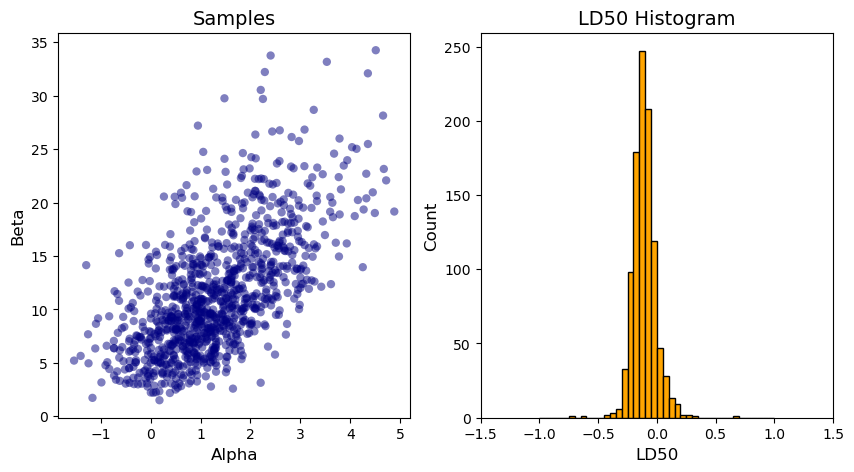

In [7]:
## Plots

# create the figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot the scatter plot on the first axis
axs[0].scatter(samp_A, samp_B, alpha=0.5, color='navy', edgecolors='none')
axs[0].set_xlabel('Alpha', fontsize=12)
axs[0].set_ylabel('Beta', fontsize=12)
axs[0].set_title('Samples', fontsize=14)

# plot the histogram on the second axis
axs[1].hist(samp_ld50, bins=np.arange(-1, 1 + 0.05, 0.05), color='orange', edgecolor='black')
axs[1].set_xlim(-1.5, 1.5)
axs[1].set_xlabel('LD50', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].set_title('LD50 Histogram', fontsize=14)

plt.show()